# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](#10)
11. [Conclusion](#11)
12. [References](12)

<a id="1"></a> 
# **Introduction**

Time series modeling is a valuable methodology in the field of demand forecasting, especially in highly dynamic industries such as food delivery. Accurate forecasting of food delivery order demand is essential for delivery service providers to efficiently plan their operations and meet the changing needs of their customers.

Demand for food delivery orders is subject to a number of factors, such as seasonality, trends, special events, and consumer behaviors. Time series modeling allows these patterns to be captured and analyzed to reliably predict future demand. By properly understanding and modeling these patterns, food delivery companies can optimize their production capacity, inventory management, logistics, and human resources.

Time series analysis is based on the idea that historical data contains valuable information that can be used to predict future behavior. Through techniques such as series decomposition, trend analysis, seasonality identification, and the application of ARIMA models or other more advanced approaches, it is possible to capture key characteristics of food delivery order demand and generate accurate forecasts. .

Applying time series modeling to demand forecasting for food delivery orders has numerous benefits. It allows companies to anticipate seasonal variations, such as increases in orders during holidays or decreases in periods of lower demand. Additionally, it helps identify long-term trends, such as changes in consumer habits or customer preferences.

By using time series modeling, companies can make informed decisions regarding supply chain management, production capacity, workforce planning, and resource allocation. This gives them a competitive advantage by ensuring they can meet demand efficiently, minimizing costs and maximizing customer satisfaction.

In conclusion, time series modeling applied to forecasting the demand for food delivery orders is an essential tool for companies in the food delivery sector. It allows them to anticipate and adapt to fluctuations in demand, optimizing their operations and improving the customer experience. By understanding and leveraging the patterns and trends present in historical data, businesses can make strategic decisions and achieve a more accurate and reliable forecast of food delivery order demand.

<a id="2"></a>
# **Case study**

Time series modeling for demand forecasting of the number of food delivery orders

In this case study, we will explore how a food delivery company uses time series modeling to forecast demand for its number of orders. The company faces the need to efficiently plan its operations, manage its inventory and ensure timely delivery to meet its customers' expectations.

The company has collected historical data for the past two years, including daily information on the number of food delivery orders placed. Additionally, additional data, such as the day of the week, special events, promotions, and menu changes, is available that could influence demand. The goal is to use this data to build a time series model that can predict future demand for food delivery orders, taking into account the patterns and trends present in the historical data.

Steps of time series analysis:

1. Data exploration
2. Data preparation
3. Decomposition of series
4. Model selection
5. Model adjustment
6. Prognosis and monitoring
7. Validation and evaluation

Time series modeling applied to forecasting the demand for the number of food delivery orders offers companies in the sector a powerful tool for planning and making strategic decisions. By understanding and leveraging the patterns and trends present in historical data, companies can anticipate future demand, optimize their operations, and improve customer satisfaction. However, it is important to note that forecast accuracy may depend on data quality, appropriate model selection, and consideration of external factors that may influence demand, such as special events or changes in consumer preferences. .

# Getting Libraries


In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Tool sklearn
# ==============================================================================
from sklearn.preprocessing import LabelEncoder

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#6495ED',  # #212946  '#99FFDE', '#ffde99', '#de99ff'  'coral','#FFDAB9','yellowgreen','#6495ED'
    'axes.facecolor': 'gray',
    'savefig.facecolor': 'yellowgreen',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **Load datasets**

Weekly Demand data (train.csv): Contains the historical demand data for all centers 

Variable Definition

- id Unique: ID
- week: Week No
- center_id: Unique ID for fulfillment center
- meal_id: Unique ID for Meal
- checkout_price: Final price including discount, taxes & delivery charges
- base_price: Base price of the meal
- emailer_for_promotion: Emailer sent for promotion of meal
- homepage_featured: Meal featured at homepage
- num_orders (Target): Orders Count

fulfilment_center_info.csv: Contains information for each fulfilment center

Variable Definition

- center_id: Unique ID for fulfillment center
- city_code: Unique code for city
- region_code: Unique code for region
- center_type: Anonymized center type
- op_area: Area of operation (in km^2)

meal_info.csv: Contains information for each meal being served

Variable Definition

- meal_id: Unique ID for the meal
- category: Type of meal (beverages/snacks/soups)
- cuisine: Meal cuisine (Indian/Italian)

Download the data [Here](https://github.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/blob/main/Data/food_demand_forecasting.zip)

In [3]:
# Load datasets
train_data = pd.read_csv('../tutorial/train.csv')
meal_info = pd.read_csv('../tutorial/meal_info.csv.xls')
center_info = pd.read_csv('../tutorial/fulfilment_center_info.csv.xls')

In [4]:
# Merge datasets for a consolidated view
full_data = train_data.merge(meal_info, on='meal_id', how='left')
full_data = full_data.merge(center_info, on='center_id', how='left')

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [5]:
full_data["unique_id"]="1"
full_data=full_data.rename(columns={"week": "ds", "num_orders": "y"})
full_data.head()

,id,ds,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,y,category,cuisine,city_code,region_code,center_type,op_area,unique_id
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,1


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   ds                     456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   y                      456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

<a id="3"></a>
# **Explore Data with the plot method**

# Utility Function

In [7]:
# EDA Functions
def plot_distributions(data, variables, titles):
    #sns.set_style("whitegrid")
    plt.figure(figsize=(18, 5))
    for i, var in enumerate(variables):
        plt.subplot(1, 3, i+1)
        sns.histplot(data[var], bins=50, kde=True)
        plt.title(titles[i])
    plt.tight_layout()
    plt.show()

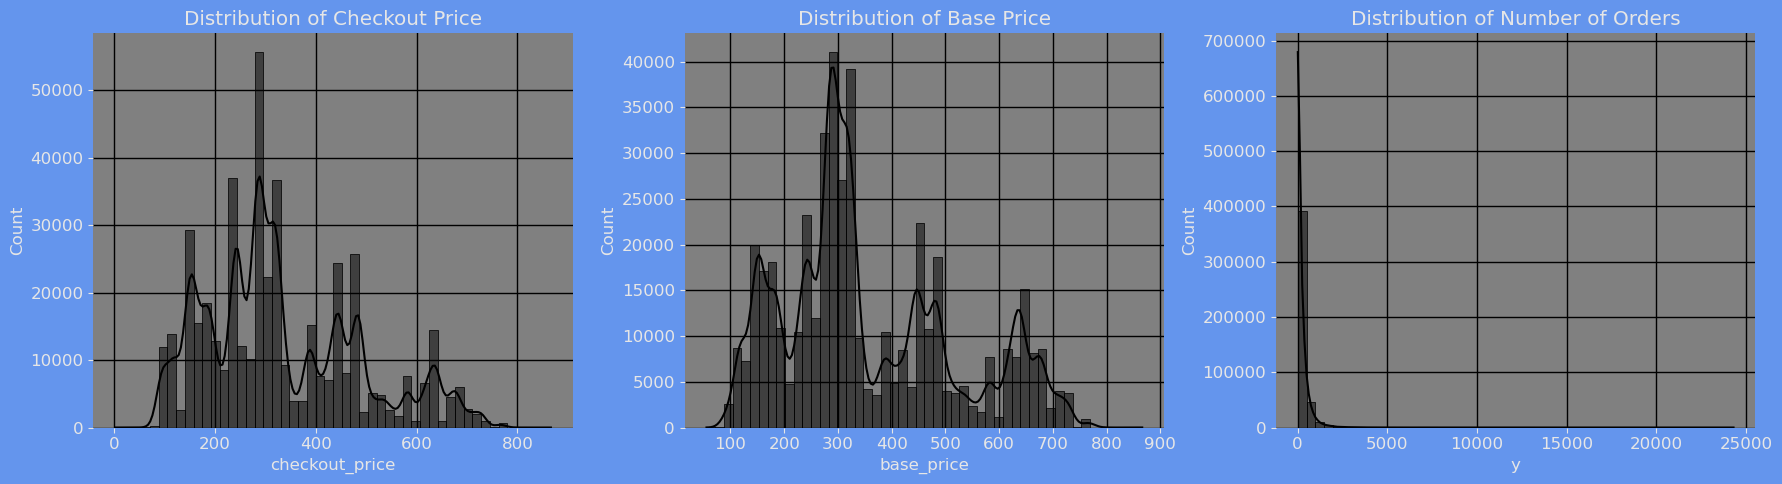

In [8]:
variables_to_plot = ['checkout_price', 'base_price', 'y']
titles = ['Distribution of Checkout Price', 'Distribution of Base Price', 'Distribution of Number of Orders']
plot_distributions(full_data, variables_to_plot, titles)

In [9]:
def plot_weekly_orders(data):
    weekly_orders = data.groupby('ds')['y'].sum().reset_index()
    sns.lineplot(x='ds', y='y', data=weekly_orders)
    plt.title('Trend of Total Orders Over Weeks')
    plt.show()

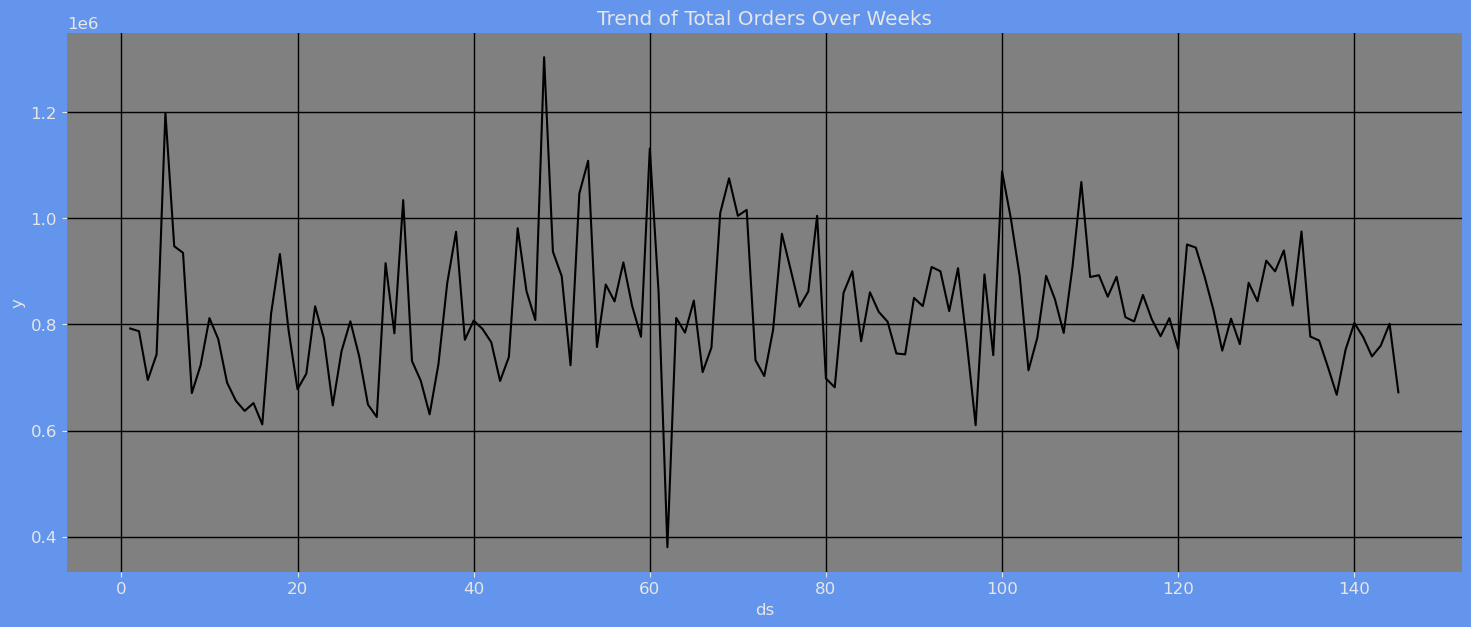

In [10]:
plot_weekly_orders(full_data)


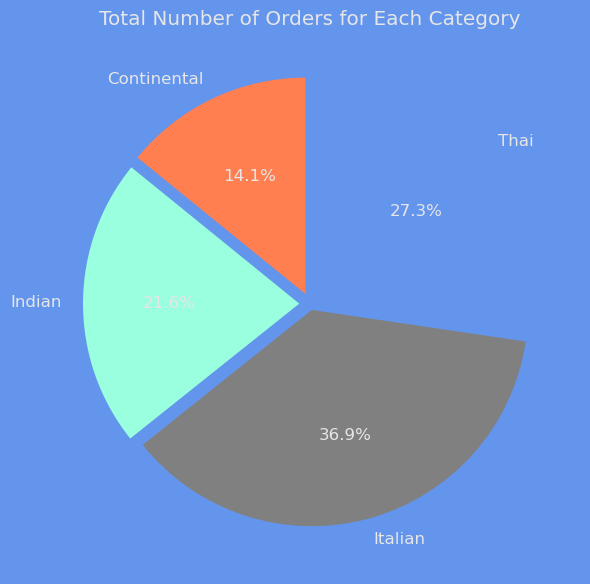

In [11]:
plt.figure(figsize=(18,6))
colors = ['coral','#99FFDE','gray','#6495ED']
plt.pie(full_data.groupby(['cuisine']).y.sum(),
    labels=full_data.groupby(['cuisine']).y.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

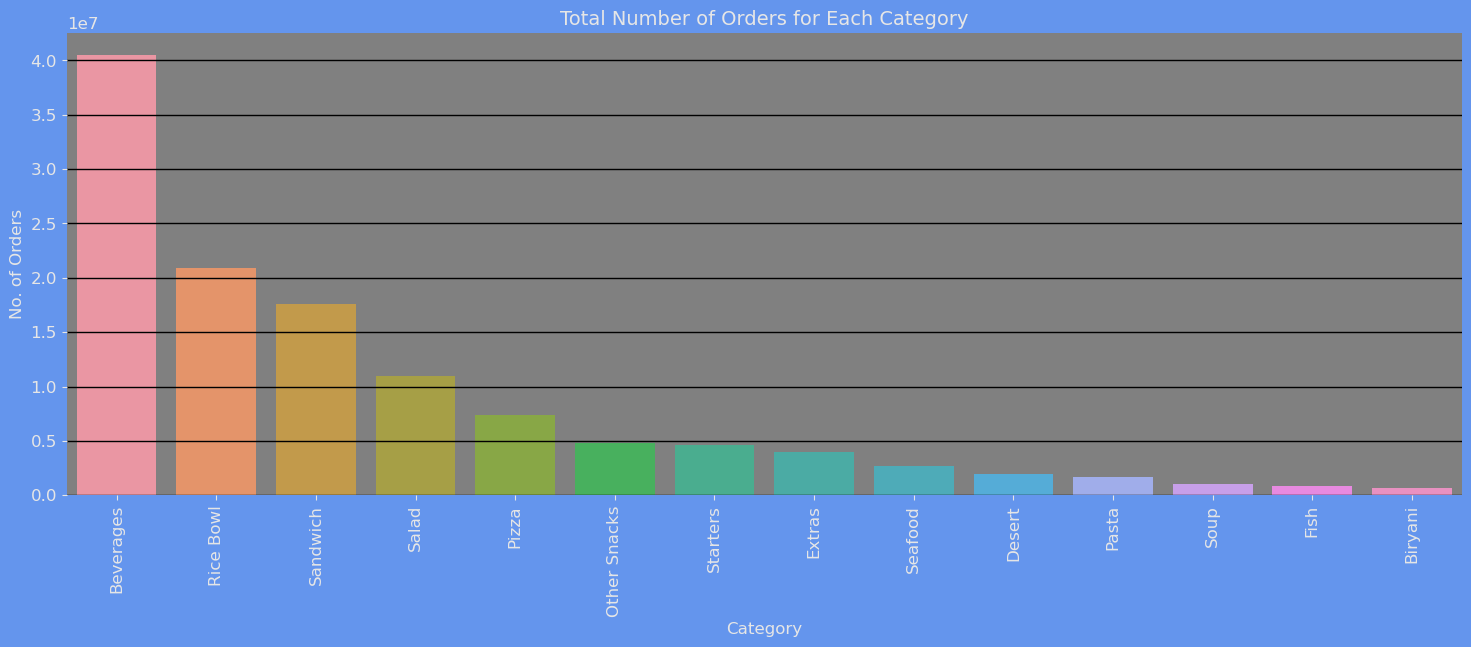

In [12]:
fig=plt.figure(figsize=(18,6))

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='y', x='category', data=full_data.groupby('category').y.sum().sort_values(ascending=False).reset_index()); #palette='YlOrRd_r'
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

In [13]:
# Data Preparation
label_encoders = {}
categorical_columns = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type']
for column in categorical_columns:
    le = LabelEncoder()
    full_data[column] = le.fit_transform(full_data[column])
    label_encoders[column] = le

# Create lag features
for week_lag in [1, 2, 3, 4, 5]:
    full_data[f'lag_{week_lag}'] = full_data.groupby(['center_id', 'meal_id'])['y'].shift(week_lag)

# Removing NA values
full_data = full_data.dropna()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [14]:
df1=full_data.groupby("ds")[["y"]].sum().reset_index()
df1["unique_id"]="1"

In [15]:
train = df1[df1.ds<=133] 
test=df1[(df1['ds'] > 133)]

train.shape, test.shape

((128, 3), (12, 3))

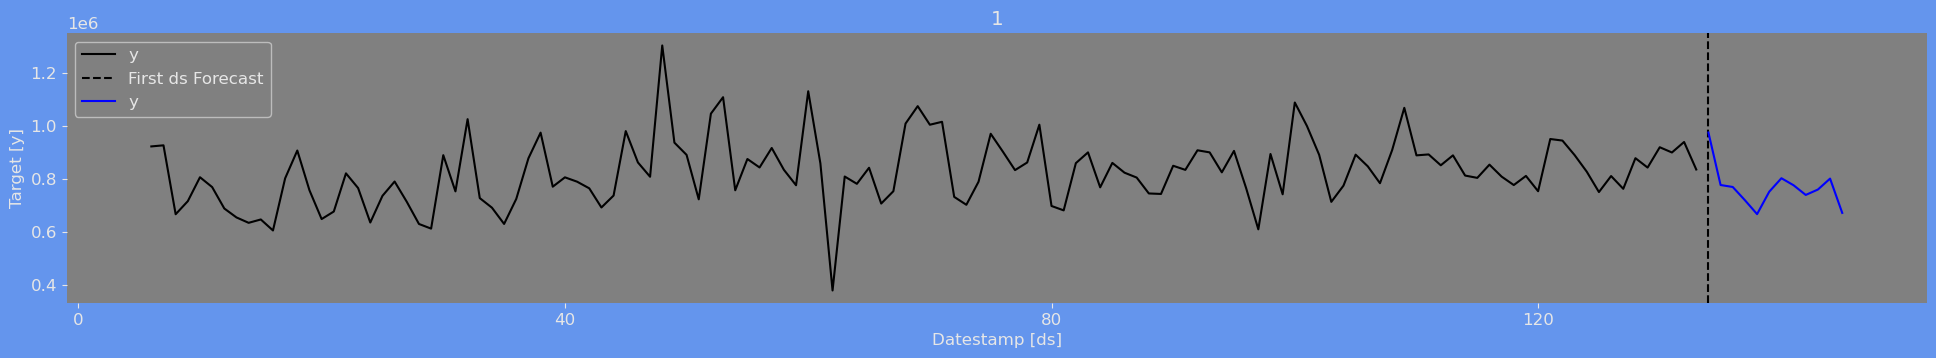

In [16]:
StatsForecast.plot(train, test,max_insample_length=300)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `Seasonal Exponential Smoothing Optimized, Arima, MSTL` model, using the `SeasonalExponentialSmoothingOptimized, AutoARIMA, MSTL` function. This model will help us forecast user demand in the next 12 week.

In [17]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA,  SeasonalNaive,Holt, HoltWinters,  MSTL, AutoCES, AutoETS, AutoTheta, SeasonalExponentialSmoothingOptimized

In [18]:
season_length = 52 # Weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [SeasonalNaive(season_length=season_length),
          AutoARIMA(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          MSTL(
              season_length=[52], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [19]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='W', 
    n_jobs=-1)

## **Fit the Model**

In [20]:
sf.fit()

StatsForecast(models=[SeasonalNaive,AutoARIMA,SeasESOpt,MSTL])

## **Predict Method**

In [21]:
Y_hat = sf.predict(horizon)
Y_hat

,ds,SeasonalNaive,AutoARIMA,SeasESOpt,MSTL
unique_id,,,,,
1,134,859449.0,890939.0625,8.892559e+05,806138.3125
1,135,900091.0,931581.0625,7.545561e+05,863316.5625
1,136,768287.0,799777.0625,1.022699e+06,733806.7500
1,137,860378.0,891868.0625,7.290071e+05,825898.0625
1,138,823515.0,855005.0625,6.928816e+05,789094.8750
1,139,805099.0,836589.0625,6.319887e+05,770799.6875
1,140,745179.0,776669.0625,7.248266e+05,711063.0000
1,141,743339.0,774829.0625,8.764564e+05,709858.1250
1,142,849570.0,881060.0625,9.732458e+05,816760.1250


## **Forecasting Plot**

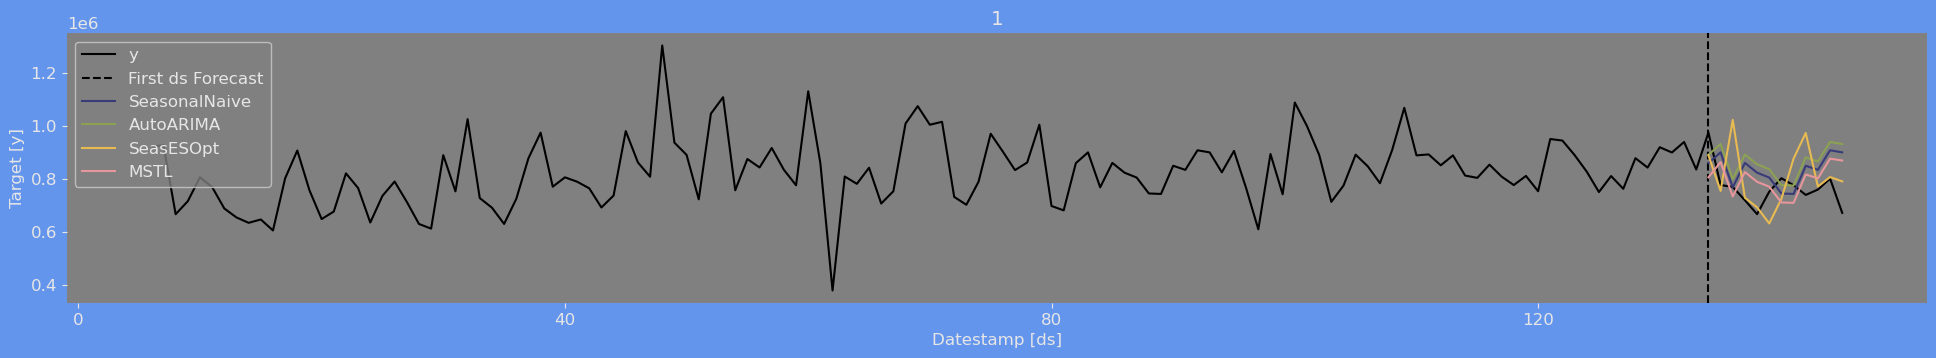

In [22]:
StatsForecast.plot(df1, Y_hat)

<a id="6"></a>
# **Evaluate the model**

In [23]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [24]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [25]:
print(evaluate_performace(train, test,Y_hat.reset_index() , models=['SeasonalNaive', "AutoARIMA",
       'SeasESOpt',   'MSTL']))

                   mase            mae       mape           rmse      smape
SeasonalNaive  0.660623   99966.583333  13.435819  115836.592713  12.457096
AutoARIMA      0.763245  115495.614583  15.677473  136131.495916  14.155164
SeasESOpt      0.585912   88661.250000  11.648023  119730.029448  10.902105
MSTL           0.599132   90661.739583  11.945037  103649.825496  11.512545


<a id="7"></a>
# **Exogenous variables**
We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

In [26]:
df_exo=full_data.groupby("ds")[["y",'checkout_price', 'base_price','lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].sum().reset_index()
df_exo["unique_id"]="1"
df_exo

,ds,y,checkout_price,base_price,lag_1,lag_2,lag_3,lag_4,lag_5,unique_id
0,6,922551,759570.55,833795.44,1174545.0,709285.0,660681.0,747887.0,754825.0,1
1,7,926671,863582.33,899993.77,934460.0,1181927.0,713931.0,664961.0,746772.0,1
2,8,666798,870464.20,913268.85,930079.0,939000.0,1185525.0,721551.0,676952.0,1
3,9,716119,886783.83,956095.43,671468.0,940180.0,949680.0,1192821.0,726809.0,1
4,10,806343,897004.82,971731.66,719551.0,671923.0,942381.0,952296.0,1196619.0,1
...,...,...,...,...,...,...,...,...,...,...
135,141,776133,1132151.84,1167231.88,798641.0,751253.0,667438.0,720507.0,777234.0,1
136,142,739592,1123970.87,1155527.38,776256.0,796930.0,749975.0,667248.0,719744.0,1
137,143,759926,1131454.15,1193624.73,742249.0,779355.0,799625.0,752285.0,670589.0,1
138,144,801182,1113316.55,1191229.85,759968.0,742870.0,780109.0,798260.0,751489.0,1


In [27]:
exogen=full_data.groupby("ds")[['checkout_price', 'base_price','lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].sum().reset_index()
exogen["unique_id"]="1"
exogen

,ds,checkout_price,base_price,lag_1,lag_2,lag_3,lag_4,lag_5,unique_id
0,6,759570.55,833795.44,1174545.0,709285.0,660681.0,747887.0,754825.0,1
1,7,863582.33,899993.77,934460.0,1181927.0,713931.0,664961.0,746772.0,1
2,8,870464.20,913268.85,930079.0,939000.0,1185525.0,721551.0,676952.0,1
3,9,886783.83,956095.43,671468.0,940180.0,949680.0,1192821.0,726809.0,1
4,10,897004.82,971731.66,719551.0,671923.0,942381.0,952296.0,1196619.0,1
...,...,...,...,...,...,...,...,...,...
135,141,1132151.84,1167231.88,798641.0,751253.0,667438.0,720507.0,777234.0,1
136,142,1123970.87,1155527.38,776256.0,796930.0,749975.0,667248.0,719744.0,1
137,143,1131454.15,1193624.73,742249.0,779355.0,799625.0,752285.0,670589.0,1
138,144,1113316.55,1191229.85,759968.0,742870.0,780109.0,798260.0,751489.0,1


# **Splitting training and test data with exogenous variables**
<a id="8"></a>
Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 8 weekly to test and evaluate the performance of our model.

In [28]:
train_exo = df_exo[df_exo.ds<=133] 
test_exo=exogen[(exogen['ds'] > 133)]

train_exo.shape, test_exo.shape

((128, 10), (12, 9))

<a id="9"></a>
# **Implementation of StatsForecast with exogenous variables**

In [29]:
season_length = 52 # Weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models_exo = [SeasonalNaive(season_length=season_length),
          AutoARIMA(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          MSTL(
              season_length=[52], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [30]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    df=train_exo,
    models=models_exo,
    freq='W', 
    n_jobs=-1)

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [31]:
sf_exo.fit(train_exo,test_exo)

StatsForecast(models=[SeasonalNaive,AutoARIMA,SeasESOpt,MSTL])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [32]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo

,ds,SeasonalNaive,AutoARIMA,SeasESOpt,MSTL
unique_id,,,,,
1,134,859449.0,974135.4375,8.892559e+05,850780.4375
1,135,900091.0,927627.2500,7.545561e+05,870356.3750
1,136,768287.0,725688.3125,1.022699e+06,726893.7500
1,137,860378.0,832391.1250,7.290071e+05,833015.4375
1,138,823515.0,736504.7500,6.928816e+05,786672.6250
1,139,805099.0,786398.6875,6.319887e+05,768213.3125
1,140,745179.0,725696.2500,7.248266e+05,717403.1250
1,141,743339.0,693703.2500,8.764564e+05,691978.1250
1,142,849570.0,687313.3750,9.732458e+05,790016.6875


## **Forecasting Plot**

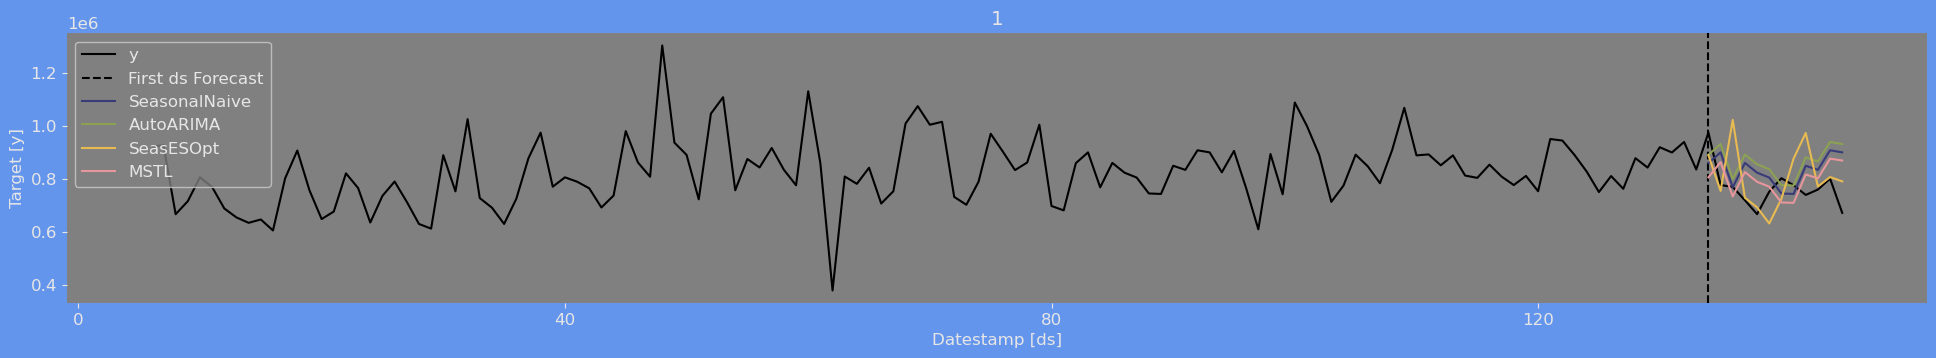

In [33]:
StatsForecast.plot(df1, Y_hat)

<a id="10"></a>
# **Evaluate the model for exogenous variables**

In [34]:
actual_exo=df_exo[df_exo.ds>133] 

In [35]:
print("With exogenous variable")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() ,  models=['SeasonalNaive', "AutoARIMA",'SeasESOpt',   'MSTL']))
print("======"*10)
print("No exogenous variable")
print(evaluate_performace(train, test,Y_hat.reset_index() ,  models=['SeasonalNaive', "AutoARIMA",'SeasESOpt',   'MSTL']))

With exogenous variable
                   mase           mae       mape           rmse      smape
SeasonalNaive  0.660623  99966.583333  13.435819  115836.592713  12.457096
AutoARIMA      0.509984  77171.723958  10.394003   88520.913338  10.000981
SeasESOpt      0.585912  88661.250000  11.648023  119730.029448  10.902105
MSTL           0.564022  85348.723958  11.317243   95653.604670  10.899112
No exogenous variable
                   mase            mae       mape           rmse      smape
SeasonalNaive  0.660623   99966.583333  13.435819  115836.592713  12.457096
AutoARIMA      0.763245  115495.614583  15.677473  136131.495916  14.155164
SeasESOpt      0.585912   88661.250000  11.648023  119730.029448  10.902105
MSTL           0.599132   90661.739583  11.945037  103649.825496  11.512545


<a id="11"></a>
# **Conclusion**

In the presented analysis, different forecasting methods were compared using both exogenous variables and without exogenous variables to predict the number of food delivery orders. The results were evaluated using various evaluation metrics, such as MASE, MAE, MAPE, RMSE, and SMAPE.

With exogenous variables:
- SeasonalNaive: This method obtained a MASE of 0.660623, indicating that its performance is moderate compared to the other methods. The MAE and RMSE are high, with values of 99966.583333 and 115836.592713, respectively. The MAPE and SMAPE are also relatively high, with values of 13.435819 and 12.457096, respectively.
- AutoARIMA: This method showed better performance compared to SeasonalNaive, with a MASE of 0.509984. The MAE, MAPE, and SMAPE are lower, with values of 77171.723958, 10.394003, and 10.000981, respectively. The RMSE is also lower, with a value of 88520.913338.
- SeasESOpt: This method obtained a MASE of 0.585912, indicating similar performance to SeasonalNaive but slightly improved. The MAE and SMAPE are lower, with values of 88661.250000 and 10.902105, respectively. However, the RMSE is high, with a value of 119730.029448.
- MSTL: This method shows similar performance to SeasESOpt, with a MASE of 0.564022. The MAE and SMAPE are comparable to the SeasESOpt values, with 85348.723958 and 10.899112, respectively. The RMSE is relatively low compared to the other methods, with a value of 95653.604670.

Without exogenous variables:
- SeasonalNaive: The results are the same as in the previous case, since the method does not depend on exogenous variables.
- AutoARIMA: In this case, AutoARIMA shows slightly lower performance compared to using exogenous variables. The MASE increases to 0.763245, and the MAE, MAPE, RMSE, and SMAPE are also higher, with values of 115495.614583, 15.677473, 136131.495916, and 14.155164, respectively.
- SeasESOpt: The performance is identical to the case with exogenous variables, since this method does not use exogenous variables for the forecast.
- MSTL: In this case, MSTL shows a performance comparable to the case with exogenous variables. The MASE is slightly higher, with a value of 0.599132. The MAE, MAPE, and SMAPE are also slightly higher, with values of 90661.739583, 11.945037, and 11.512545, respectively. The RMSE remains relatively low, with a value of 103649.825496.

In general, models that use exogenous variables, such as AutoARIMA and MSTL, show better performance compared to models that do not use exogenous variables, such as SeasonalNaive. These models manage to reduce error and improve the accuracy of forecasts. However, it is important to note that results may vary depending on the nature and quality of the data, as well as the availability of relevant exogenous variables.

In this analysis, AutoARIMA stands out as the best performing method, showing the lowest values in several evaluation metrics, such as MAE, MAPE, and SMAPE. However, it is advisable to consider different approaches and adjust the models according to the specific characteristics of the data and the requirements of the problem at hand. Additionally, it is important to cross-validate and evaluate the performance of the model on an independent data set to obtain a more accurate estimate of its forecasting ability.

<a id="12"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
3. [Exponential smoothing](https://nixtla.github.io/statsforecast/docs/models/autoets.html#table-of-contents)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [MSTL Model](https://nixtla.github.io/statsforecast/docs/models/multipleseasonaltrend.html)
6. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
7. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)

In [ ]:
season_length = 52 # Weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          AutoCES(season_length=season_length),
          AutoTheta(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='A', alias='Hws_add'),
          HoltWinters(season_length=season_length, error_type='M', alias='Hws_mul'),
          Holt(season_length=season_length, error_type="A", alias="Holt_Add"),
          Holt(season_length=season_length, error_type="M", alias="Holt_Multi"),
          MSTL(
              season_length=[7,365], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]